<a href="https://colab.research.google.com/github/LondheShubham153/exploratory_data_analysis/blob/main/outlier_detection_salary_and_digits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_digits

In [18]:
sample = pd.DataFrame([[1,1000],[2,2000],[3,3000],[4,4000],[5,5000],[6,6000],[7,7000],[8,8000],[9,9000],[10,20000]] 
                      , columns=['Index','Salary'])

In [19]:
sample

,Index,Salary
0,1,1000
1,2,2000
2,3,3000
3,4,4000
4,5,5000
5,6,6000
6,7,7000
7,8,8000
8,9,9000
9,10,20000


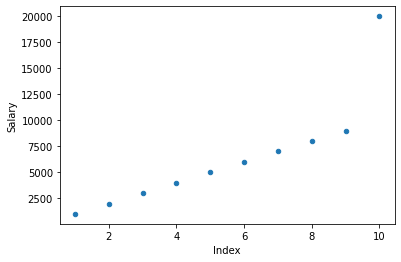

In [20]:
sample.plot.scatter(x = 'Index', y = 'Salary')

In [21]:
def outlier_treatment(datacolumn):
    sorted(datacolumn)
    Q1,Q3 = np.percentile(datacolumn , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    return lower_range,upper_range

In [22]:
lower,upper = outlier_treatment(sample.Salary)

In [23]:
sample[ (sample.Salary > upper) | (sample.Salary < lower) ]

,Index,Salary
9,10,20000


In [24]:
sample.drop(sample[ (sample.Salary > upper) | (sample.Salary < lower) ].index , inplace=True)

In [25]:
sample

,Index,Salary
0,1,1000
1,2,2000
2,3,3000
3,4,4000
4,5,5000
5,6,6000
6,7,7000
7,8,8000
8,9,9000


**Outlier Detection in digits dataset**





In [26]:

digits = load_digits()

X_digits, Y_digits = digits.data, digits.target

print("Dataset Size : ", X_digits.shape, Y_digits.shape)

Dataset Size :  (1797, 64) (1797,)


In [27]:
X_digits[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [28]:
lower_digit,upper_digit = outlier_treatment(X_digits[0])

In [29]:
lower_digit

-13.5

In [30]:
upper_digit

22.5

In [31]:
X_digits[0][ (X_digits[0] > upper_digit) | (X_digits[0] < lower_digit)]

array([], dtype=float64)